# 次元削減(主成分分析・線形判別分析)

## 構成 【合計90分】
1. 概要　【5分】
  1. 次元削減とは
  2. 特徴量抽出による次元削減
  3. イメージ例
  4. 実用例

2. 主成分分析(PCA) 【40分】
  1. 主成分分析とは
  2. 手順
    1. 主成分を抽出
    2. 特徴量変換
  3. Pythonで実装
    1. 関数定義
    2. 学習
  4. scikit-learnで実装
    1. ライブラリのインポート
    2. インスタンス作成
    3. モデルの学習
    4. 主成分の表示

3. 線形判別分析(LDA) 【20分】
  1. 主成分分析との違い
  2. 手順
  3. scikit-learnで実装

4. まとめ 【5分】

5. 質疑応答　【20分】



## 1.概要

### 1-1.次元削減とは

**次元削減とは**


*   データの次元数を減らすこと(ここでは説明変数の数を減らすこと)

**次元削減の目的**


*   データの圧縮(計算コストを減らす、過学習を防ぐ) →削減数の確認を踏まえ、適切な次元へ
*   データの可視化(特徴を読み取り、探索的分析をしやすくする) →２次元か3次元へ


**次元削減は2種類**


*   特徴量選択　(例) L1正則化、L2正則化、逐次特徴量選択アルゴリズム
*   特徴量抽出 **(今回) 主成分分析、線形判別分析**



### 1-2.特徴量抽出による次元削減

特徴量抽出による次元削減

*   特徴量選択ではいらない特徴量を完全に削除するのに対し、特徴量抽出では特徴量を変換して元の次元より低い次元の新しい特徴量部分空間を作成する



### 1-3.イメージ例

**引用先**

*   イメージ図1(引用: https://www.intage.co.jp/glossary/401/)
*   イメージ図2(引用: https://fresopiya.com/2019/06/05/irispca/)

**イメージ図1**

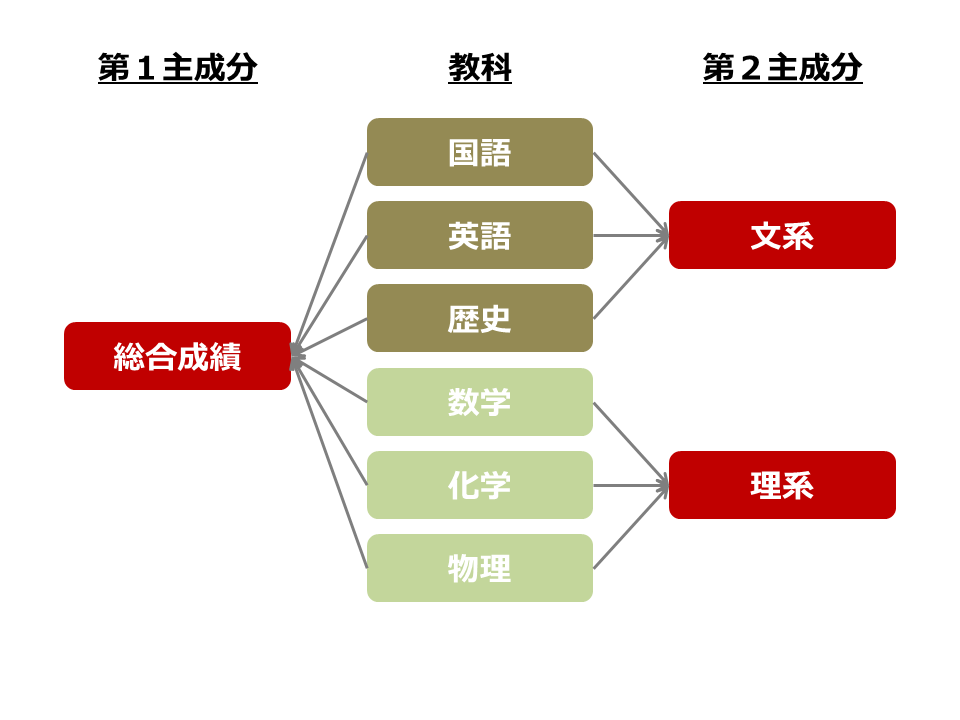

**イメージ図2**

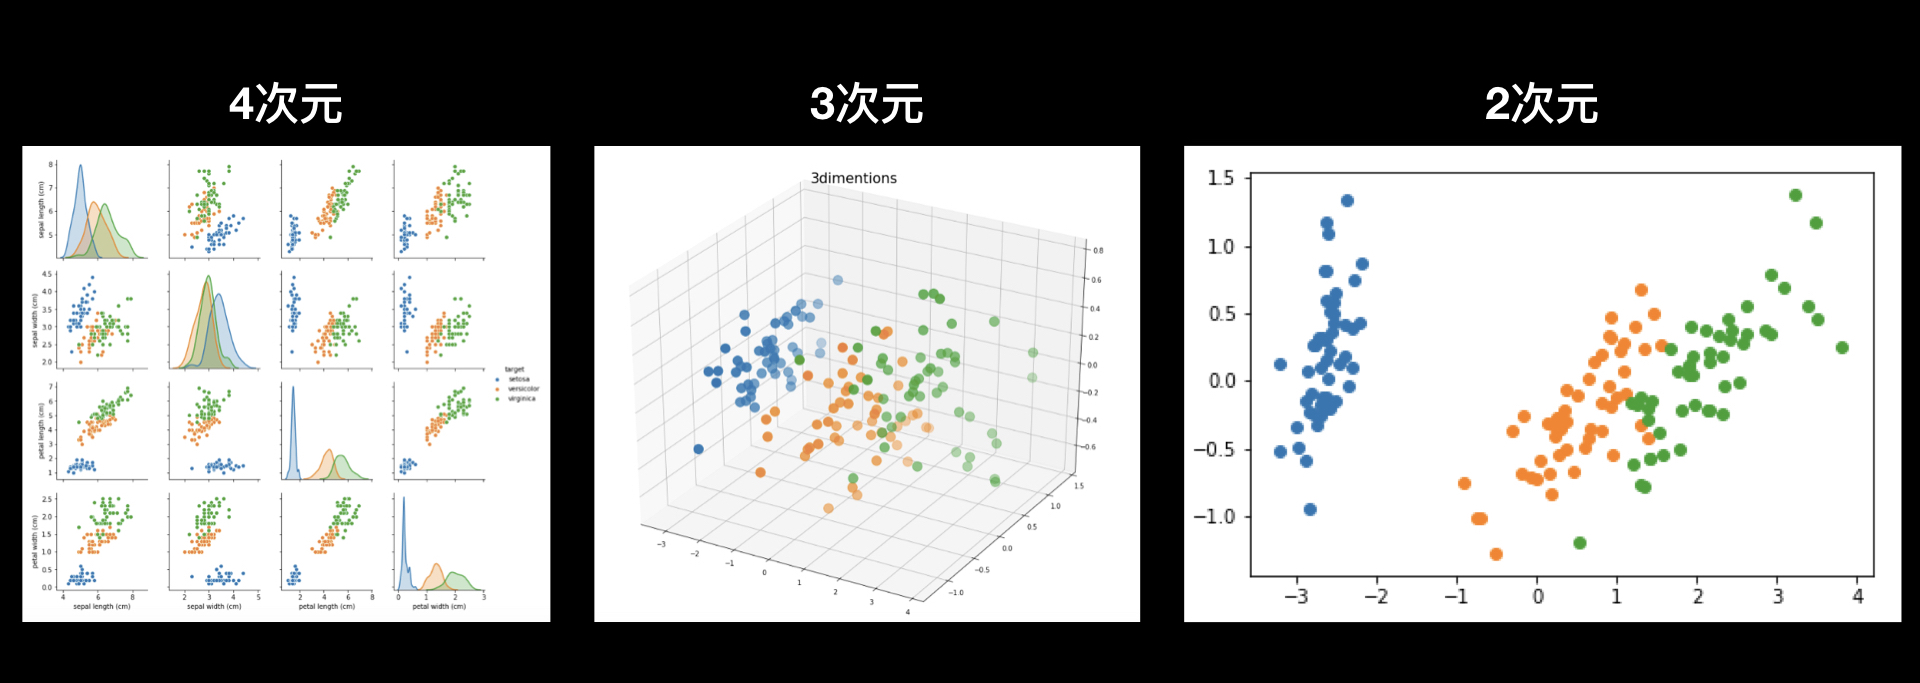

### 1-4.実用例

**実用例**


*   探索的データ解析
*   株取引での信号予測
*   ゲノムデータや遺伝子発現量の解析



## 2.主成分分析(PCA)

### 2-1.主成分分析とは

**主成分分析とは**


*   重みを付けたうえで多数のフィーチャーを統合し、少数の新たなフィーチャーを作り出す
*   集団を最もよく表現するベクトル上にデータを射影するすることで、フィーチャーを統合し、新しい指標を作成



### 2-2.手順

**PCA簡単な手順**

```
1.   データの重心を求める
2.   重心からデータのの分散が最大となる方向を見つける
3.   2で求めた方向を新たな基底とする
4.   3で作成した基底と直行する方向に対して分散最大となる方向を探す
5.   元データの次元数だけリピート
```



**PCA難しい手順**
1. 主成分を抽出する(4過程)
2. 特徴量を変換する(3過程)

**2-2-1.主成分を抽出**

1. データを標準化する
2. 共分散行列を作成する
3. 共分散行列の固有値と固有ベクトルを取得する
4. 固有値を降順でソートすることで、固有ベクトルをランク付けする

**2-2-2.特徴量変換**

4. 最も大きいk個の固有値に対応するk個の固有ベクトルを選択する。この場合のは新しい特徴部分空間の次元数を表す。
5. 上位k個の固有ベクトルから射影行列Wを作成する
6. 射影行列Wを使ってデータセットXを変換し、新しいk次元の特徴部分空間を取得する。

### 2-3.Pythonで実装

**2-3-1.関数定義**

**2-3-2.学習**

### 2-4.scikit-learnで実装

****【scikit-learnでPCAを行う流れ】****

```
1.   ライブラリのインポート
from sklearn.decomposition import PCA

2.   インスタンス作成
pca = PCA()

3.   モデルの学習
pca.fit(X)

4.   主成分の表示
clf.transform(X)
```



**【PCA()の引数】**

```
*   引数n_components:圧縮後の次元数
*   引数copy:Falseの場合、変換するデータを上書きする（デフォルトはTrue）
*   引数whiten: Trueの場合、白色化とよばれる、変数間の相関をなくす処理を行う（デフォルトはFalse）
*   引数svd_solver: 特異値分解のソルバ('auto', 'full', 'arpack', 'randomized')
*   引数random_state: 乱数
```
**【PCAクラスのメソッド】**

```
*   fit(X):学習の実行
*   fit_transform(X):PCA変換
*   transform(X): fitやfit_transformで定義したPCA変換
*   sinverse_transform(X): PCAの逆変換
```




**アイリスデータセット(4次元データセット)**

```
カラム	説明
sepal length	がく片の長さ
sepal width	幅の長さ
petal length	花弁の長さ
petal width	幅の長さ
```



**PCAを使った次元削減**

In [ ]:
# ライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
sns.set()

# データの準備
iris = load_iris()
X = iris.data
y = iris.target

# 次元削減前
print(X.shape)

# インスタンス作成からPCA実行
pca = PCA(n_components=3)
pca.fit(X)
X_ = pca.transform(X)

# 次元削減後
print(X_.shape)

(150, 4)
(150, 3)


**元の4次元データを表示**
※可視化不可能

In [ ]:
#4次元データ
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**PCA適用後の3次元データ可視化**

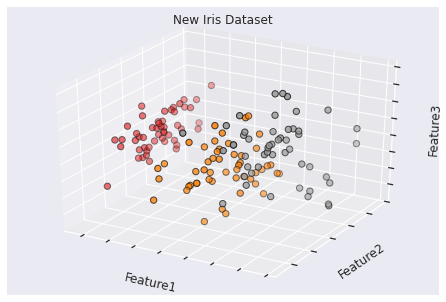

In [ ]:
# figureを生成する
fig = plt.figure()
 
# axをfigureに設定する
ax = Axes3D(fig)
 
# axesに散布図を設定する
ax.scatter3D(X_[:,0], X_[:,1], X_[:,2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)


ax.set_title("New Iris Dataset")
ax.set_xlabel("Feature1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Feature3")
ax.w_zaxis.set_ticklabels([])
 
# 表示する
plt.show()

## 3.線形判別分析(LDA)

### 3-1.主成分分析との違い

### 3-2.手順

LDA手順
1. d次元のデータセットを標準化する(dは特徴量の個数)。
2. クラス毎にd次元の平均ベクトル(各次元の平均値で構成されるベクトル)を計算する。
3. 平均ベクトルを使って、クラス間変動行列とクラス内変動行列を生成する。
4. 行列の固有ベクトルと対応する固有値を計算する。
5. 固有値を降順でソートすることで、対応する固有ベクトルをランク付けする。
6. d×k次元の変換行列Wを生成するために、最も大きいk個の固有値に対応するk個の固有ベクトルを選択する(固有ベクトルから変換行列Wを生成)。固有ベクトルは、この行列の列である。
7. 変換行列Wを使って使ってサンプルを新しい特徴部空間へ射影する。

### 3-3.scikit-learnで実装

## 4.まとめ

## 5. 質疑応答